In [121]:
cat('Last updated ', date())

Last updated  Fri Oct 14 18:26:36 2022

# Clinical Trial Data analysis using R and SAS
### Author : Ding-Geng (Din) Chen , Karl E. Peace, Pinggao Zhang

* Note : This note book is created with R in Jupyter Notebook.
* Note : I made this note book while studying the book. Additional R code in addition to the book is added if necessary such that a code is not provided or addntional explanation is needed.  For detail explanation, refer the book. 

In [122]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

## Chapter 6 Longitudinal Data Analysis for Clinical Trials

### 6.3 Longitudinal Data Analysis for Clinical Trials

#### 6.3.1 Analysis of Diastolic Blood Pressure Data

In [123]:
setwd('C:/Users/shims/Desktop/Bio-Statistics/Clinical Trial Data Analysis using R')

In [124]:
dat <- read.csv("DBP.csv", header=T)
head(dat)

,Subject,TRT,DBP1,DBP2,DBP3,DBP4,DBP5,Age,Sex
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,A,114,115,113,109,105,43,F
2,2,A,116,113,112,103,101,51,M
3,3,A,119,115,113,104,98,48,F
4,4,A,115,113,112,109,101,42,F
5,5,A,116,112,107,104,105,49,M
6,6,A,117,112,113,104,102,47,M


In [125]:
summary(dat)

    Subject          TRT                 DBP1            DBP2      
 Min.   : 1.00   Length:40          Min.   :114.0   Min.   :111.0  
 1st Qu.:10.75   Class :character   1st Qu.:115.0   1st Qu.:113.0  
 Median :20.50   Mode  :character   Median :116.5   Median :115.0  
 Mean   :20.50                      Mean   :116.7   Mean   :114.3  
 3rd Qu.:30.25                      3rd Qu.:118.0   3rd Qu.:115.0  
 Max.   :40.00                      Max.   :121.0   Max.   :119.0  
      DBP3            DBP4            DBP5            Age       
 Min.   :100.0   Min.   :102.0   Min.   : 97.0   Min.   :38.00  
 1st Qu.:112.0   1st Qu.:106.8   1st Qu.:101.8   1st Qu.:42.00  
 Median :113.0   Median :109.0   Median :106.5   Median :48.00  
 Mean   :112.4   Mean   :109.3   Mean   :106.7   Mean   :47.83  
 3rd Qu.:113.0   3rd Qu.:113.2   3rd Qu.:112.0   3rd Qu.:51.25  
 Max.   :118.0   Max.   :117.0   Max.   :115.0   Max.   :63.00  
     Sex           
 Length:40         
 Class :character  
 Mode  :c

#### Reshape the data into "long" direction

In [126]:
Dat <- reshape(dat, direction="long",
              varying=c("DBP1","DBP2","DBP3","DBP4","DBP5"),
               idvar = c("Subject","TRT","Age","Sex"),sep="")

In [127]:
# rename the variables
colnames(Dat) = c("Subject","TRT","Age","Sex","Time","DBP")

In [128]:
head(Dat)

,Subject,TRT,Age,Sex,Time,DBP
,<int>,<chr>,<int>,<chr>,<dbl>,<int>
1.A.43.F.1,1,A,43,F,1,114
2.A.51.M.1,2,A,51,M,1,116
3.A.48.F.1,3,A,48,F,1,119
4.A.42.F.1,4,A,42,F,1,115
5.A.49.M.1,5,A,49,M,1,116
6.A.47.M.1,6,A,47,M,1,117


You can see how the data is changed.

In [129]:
dat[dat$TRT=='A' & dat$Sex=='F' & dat$Age==43,]
Dat[Dat$TRT=='A' & Dat$Sex=='F' & Dat$Age==43,]

,Subject,TRT,DBP1,DBP2,DBP3,DBP4,DBP5,Age,Sex
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,A,114,115,113,109,105,43,F


,Subject,TRT,Age,Sex,Time,DBP
,<int>,<chr>,<int>,<chr>,<dbl>,<int>
1.A.43.F.1,1,A,43,F,1,114
1.A.43.F.2,1,A,43,F,2,115
1.A.43.F.3,1,A,43,F,3,113
1.A.43.F.4,1,A,43,F,4,109
1.A.43.F.5,1,A,43,F,5,105


Now the data set,_Dat_, is the "long" format, which has all possible combinations of "Subject","TRT","Age","Sex".

You can also export the date into excel form. 

In [130]:
write.csv(Dat,"Dat_long.csv")

#### Figure 6.1: DBP as a Function of Time for Each Patient 

In [131]:
# install.packages('lattice')

In [132]:
library(lattice)

In [133]:
attach(Dat)

The following objects are masked from Dat (pos = 6):

    Age, DBP, Sex, Subject, Time, TRT




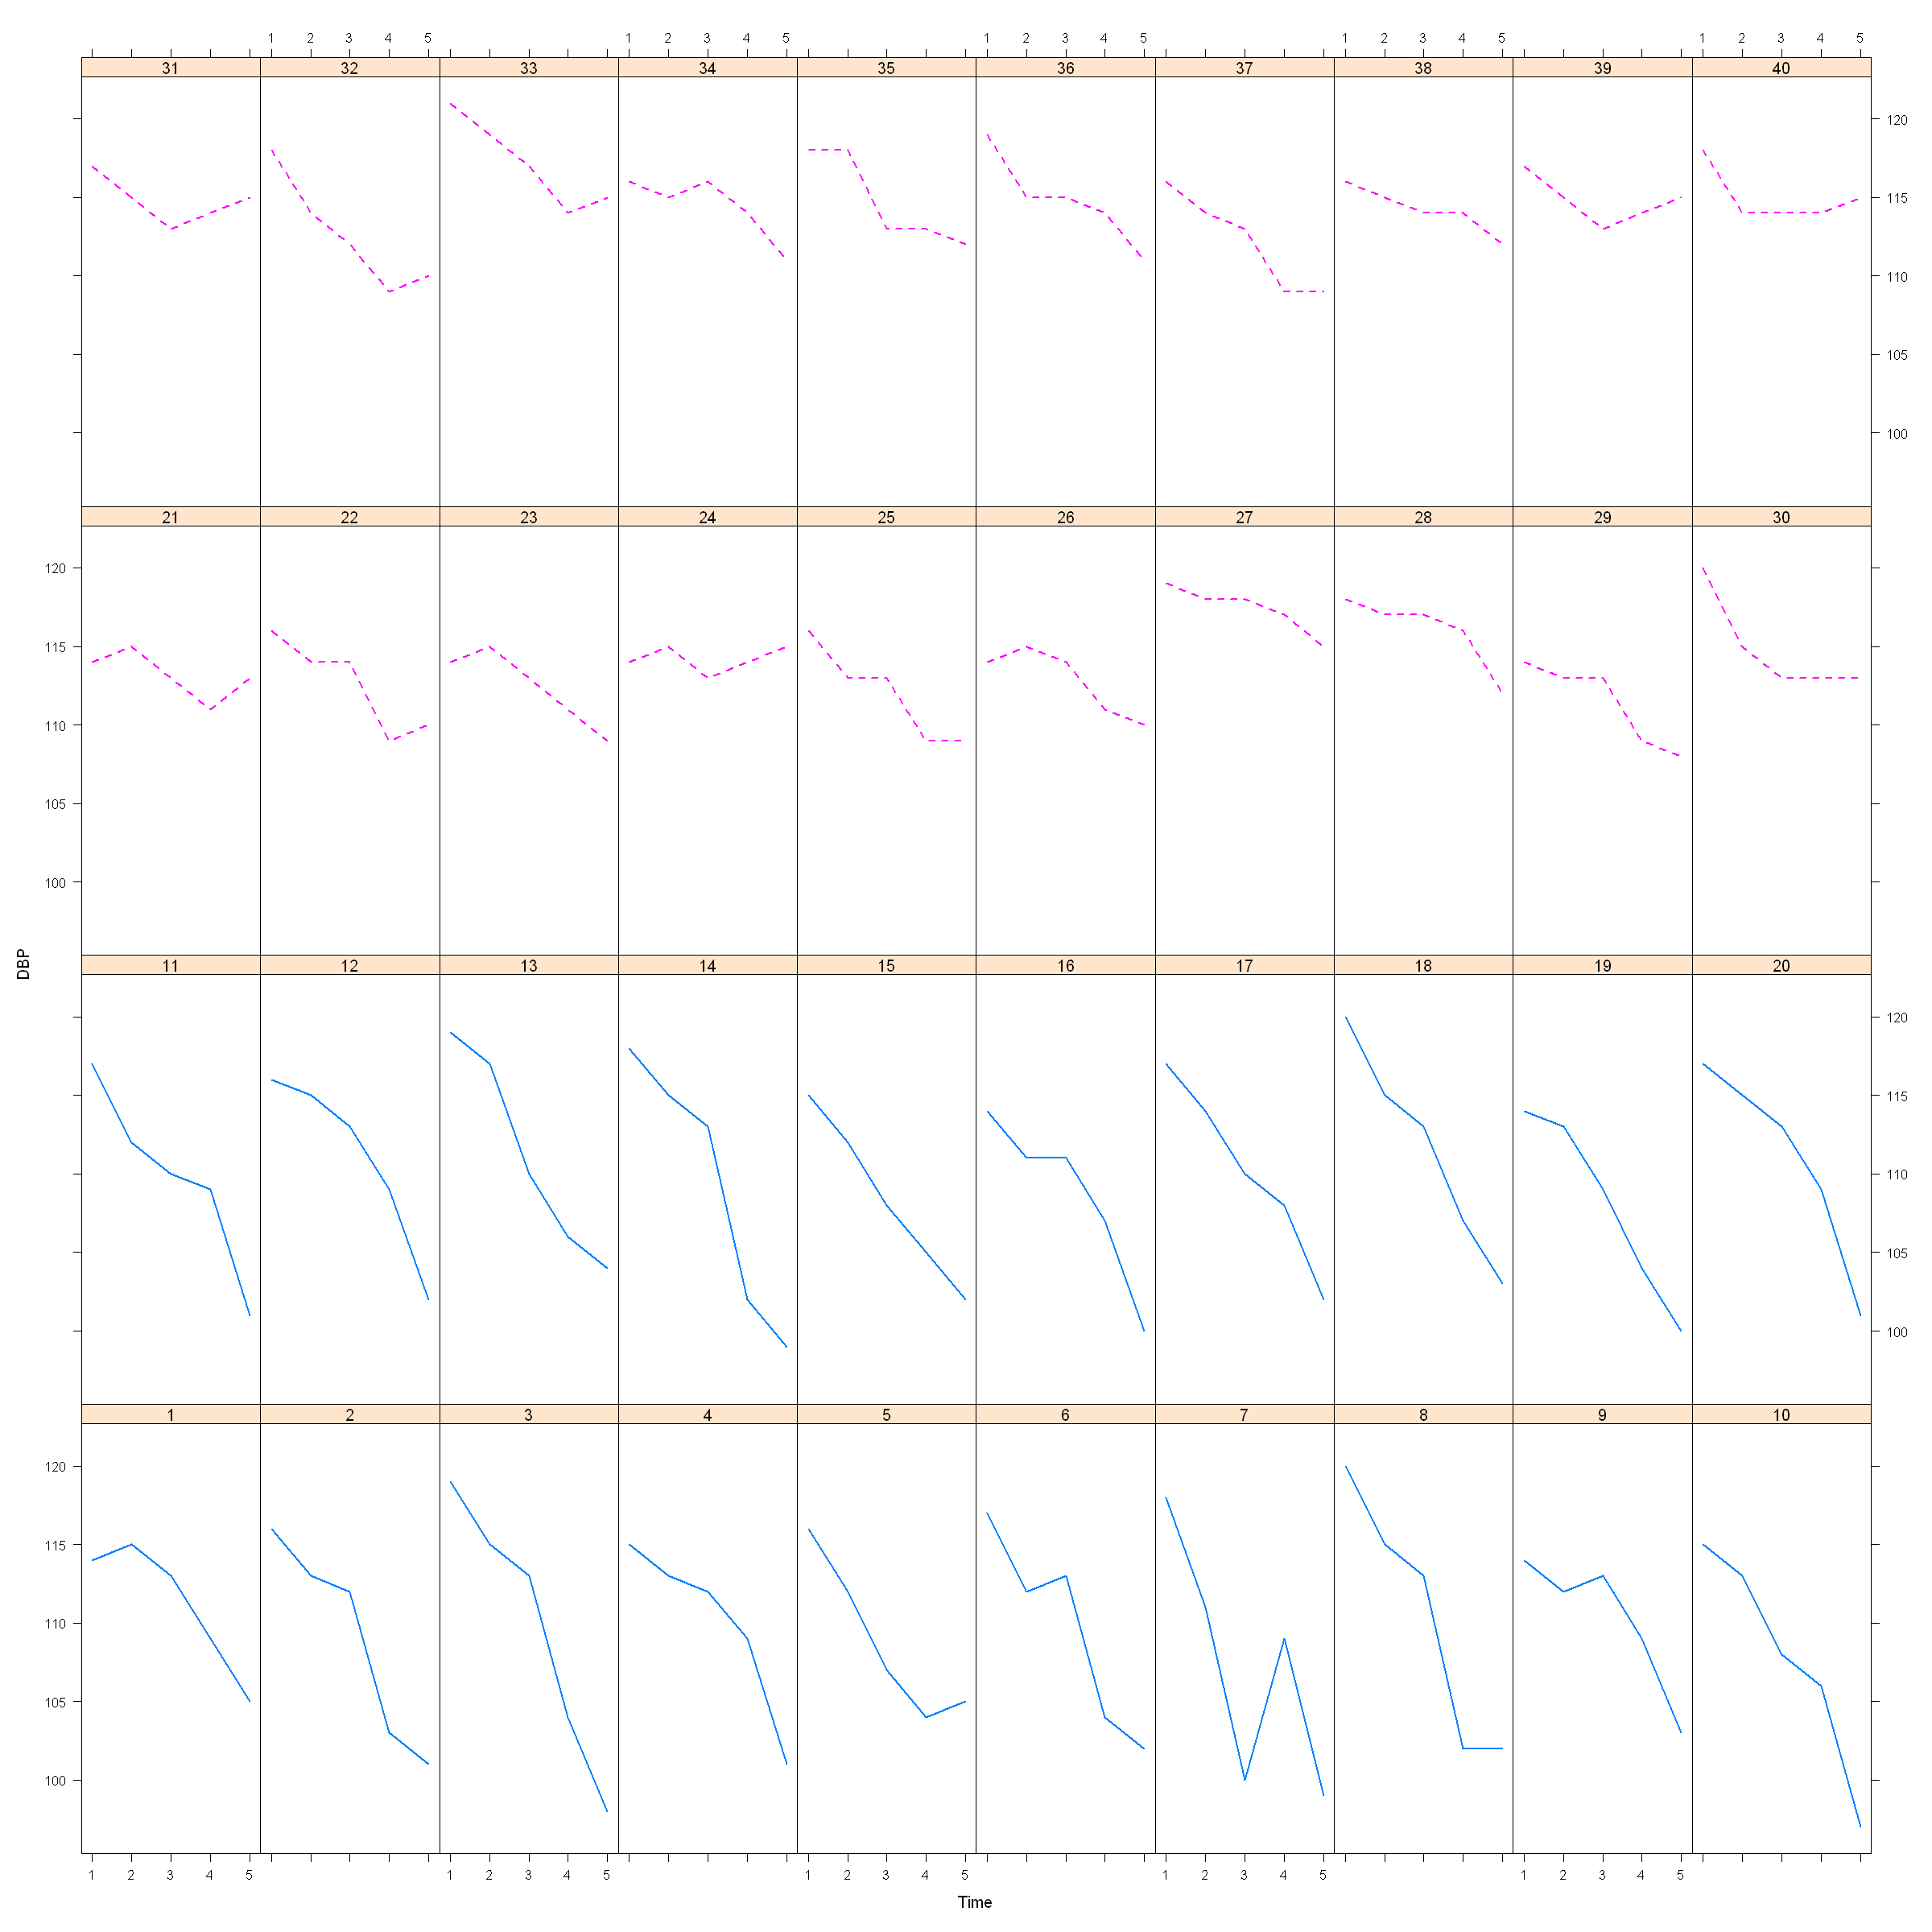

In [134]:
options(repr.plot.width=20, repr.plot.height=20)
print(xyplot(DBP ~ Time|as.factor(Subject), type="l", 
     groups=TRT, lty=c(1,8), lwd=2, layout=c(10,4), Dat))

In this figure, 
* the first 20 patients (from treatment A) are plotted using a solid line. 
* the next 20 patients (from treatment B) are plotted using dashed lines.
* Note each patient has 5 points

For better understand, we can plot only for #1 patient with tretment A.

In [135]:
subject1 <- Dat[Dat$TRT=='A' & Dat$Subject=='1',]

In [136]:
subject1

,Subject,TRT,Age,Sex,Time,DBP
,<int>,<chr>,<int>,<chr>,<dbl>,<int>
1.A.43.F.1,1,A,43,F,1,114
1.A.43.F.2,1,A,43,F,2,115
1.A.43.F.3,1,A,43,F,3,113
1.A.43.F.4,1,A,43,F,4,109
1.A.43.F.5,1,A,43,F,5,105


In [137]:
dev.off() # Resetting par Options Using dev.off() Function

null device 
          1

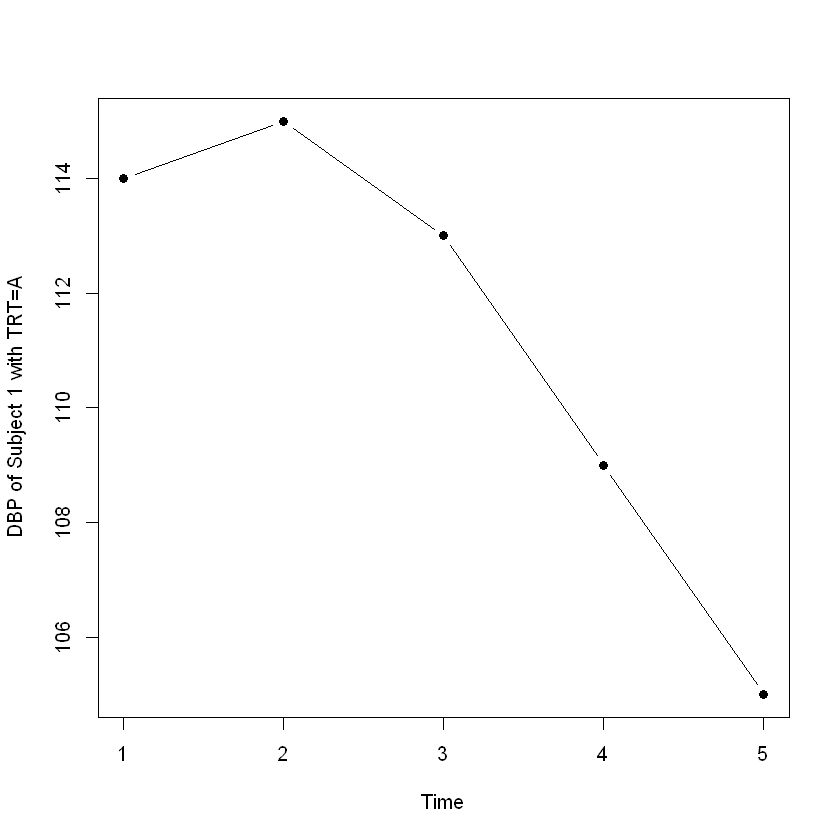

In [138]:
options(repr.plot.width=7, repr.plot.height=7)
plot(subject1$DBP, type = "b", pch = 19, ylab="DBP of Subject 1 with TRT=A", xlab='Time')

#### Figure 6.2: DBP as a Function of Time Grouped for All Patients

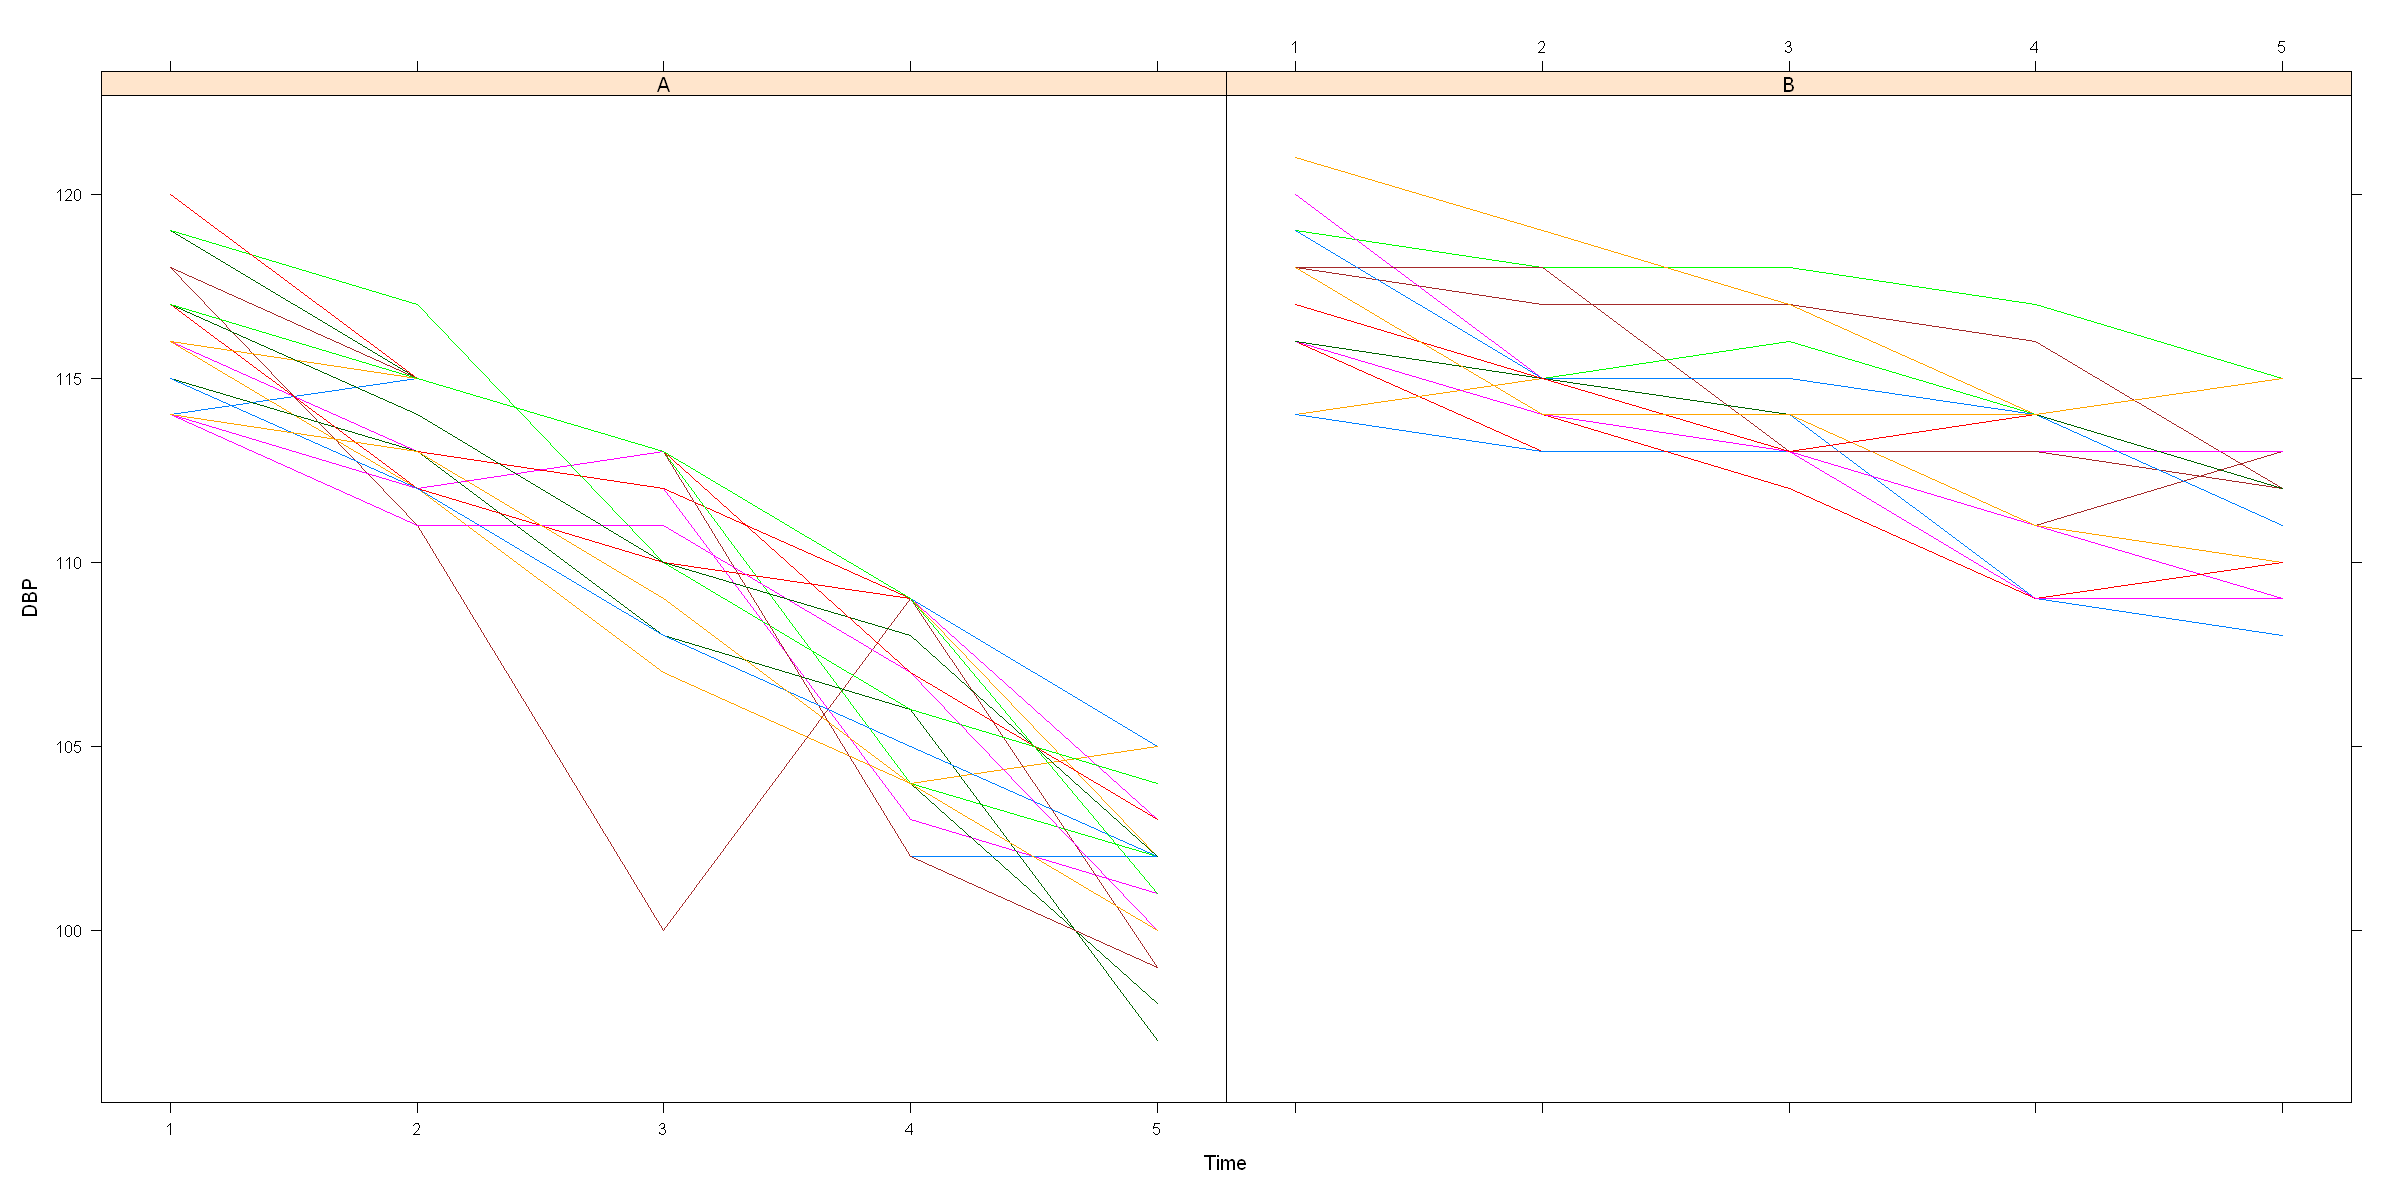

In [139]:
options(repr.plot.width=20, repr.plot.height=10)
print(xyplot(DBP ~ Time|TRT, type="l", Dat, groups=as.factor(Subject)))

We can observe that on average DBP declines at a faster rate in treatment A than in treatment B. Also, the magnitude of the decline in treatment A is greather than in treatment B. However, the 40 patients has different rate and extent of decline.

#### Figure 6.3: Boxplot by Treatments

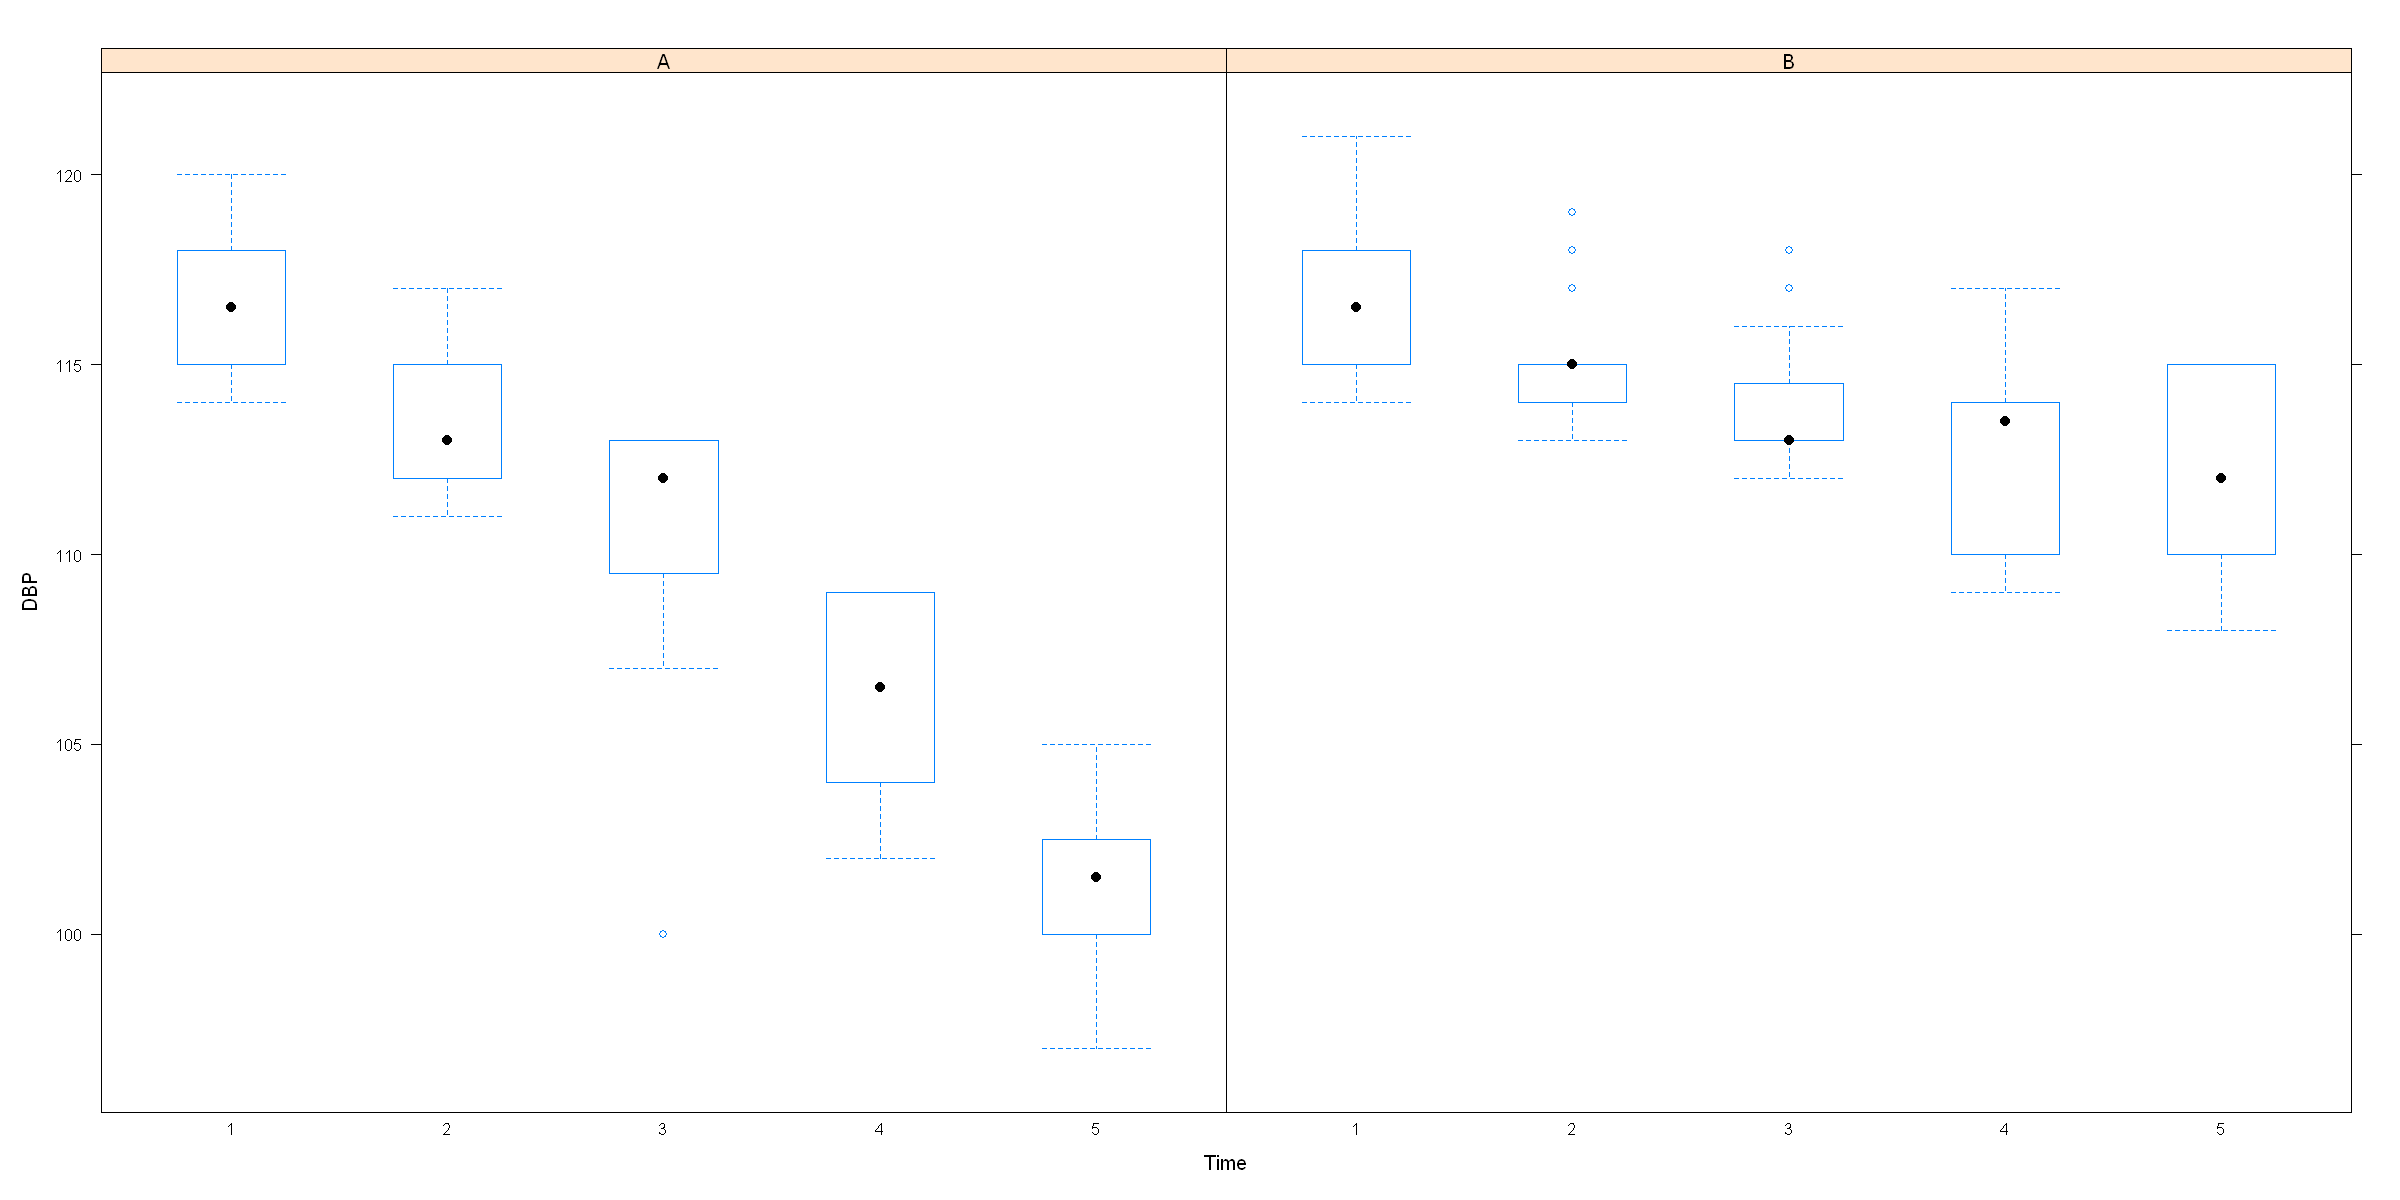

In [140]:
options(repr.plot.width=20, repr.plot.height=10)
print(bwplot(DBP ~ as.factor(Time)|TRT, Dat, xlab='Time'))

Again, we note that the rate and extent of the decline in DBP is greater in treatment group A than in treatment group B. 

#### We now further investigate the declining trend by estimating the slope and intercept for each patient.

We first loop-over the 40 patients to fit linear regressions and then extract the intercepts and slopes to make  a dataframe.

In [141]:
num.Subj <- 40

In [142]:
# initiate the intercept and slope
intercept = slope = numeric(num.Subj)

In [143]:
# loop - over
for (i in 1:num.Subj) { 
    mod <- lm(DBP ~ Time, Dat[Dat$Subject==i,]) # fit regression model
    intercept[i] <- coef(mod)[1] # extract the intercept
    slope[i] <- coef(mod)[2] # extract the slope
}

In [144]:
dat.coef <- data.frame(Subject=dat$Subject, TRT=dat$TRT, Intercept=intercept, Slope=slope)

In [145]:
dat.coef

Subject,TRT,Intercept,Slope
<int>,<chr>,<dbl>,<dbl>
1,A,118.4,-2.4
2,A,121.0,-4.0
3,A,125.7,-5.3
4,A,119.6,-3.2
5,A,117.8,-3.0
6,A,121.0,-3.8
7,A,119.4,-4.0
8,A,125.1,-4.9
9,A,117.7,-2.5


In [146]:
mean(dat.coef$Intercept)
mean(dat.coef$Slope)

[1] 119.375

[1] -2.5

The intercepts vary about 120 mmHg with a lope of about -2.5 mmHg/month.

#### Figure 6.4: Bivariate Plot for Intercept and Slope

We can draw a bivariate plot of the intercept and slope from the 40 patients.

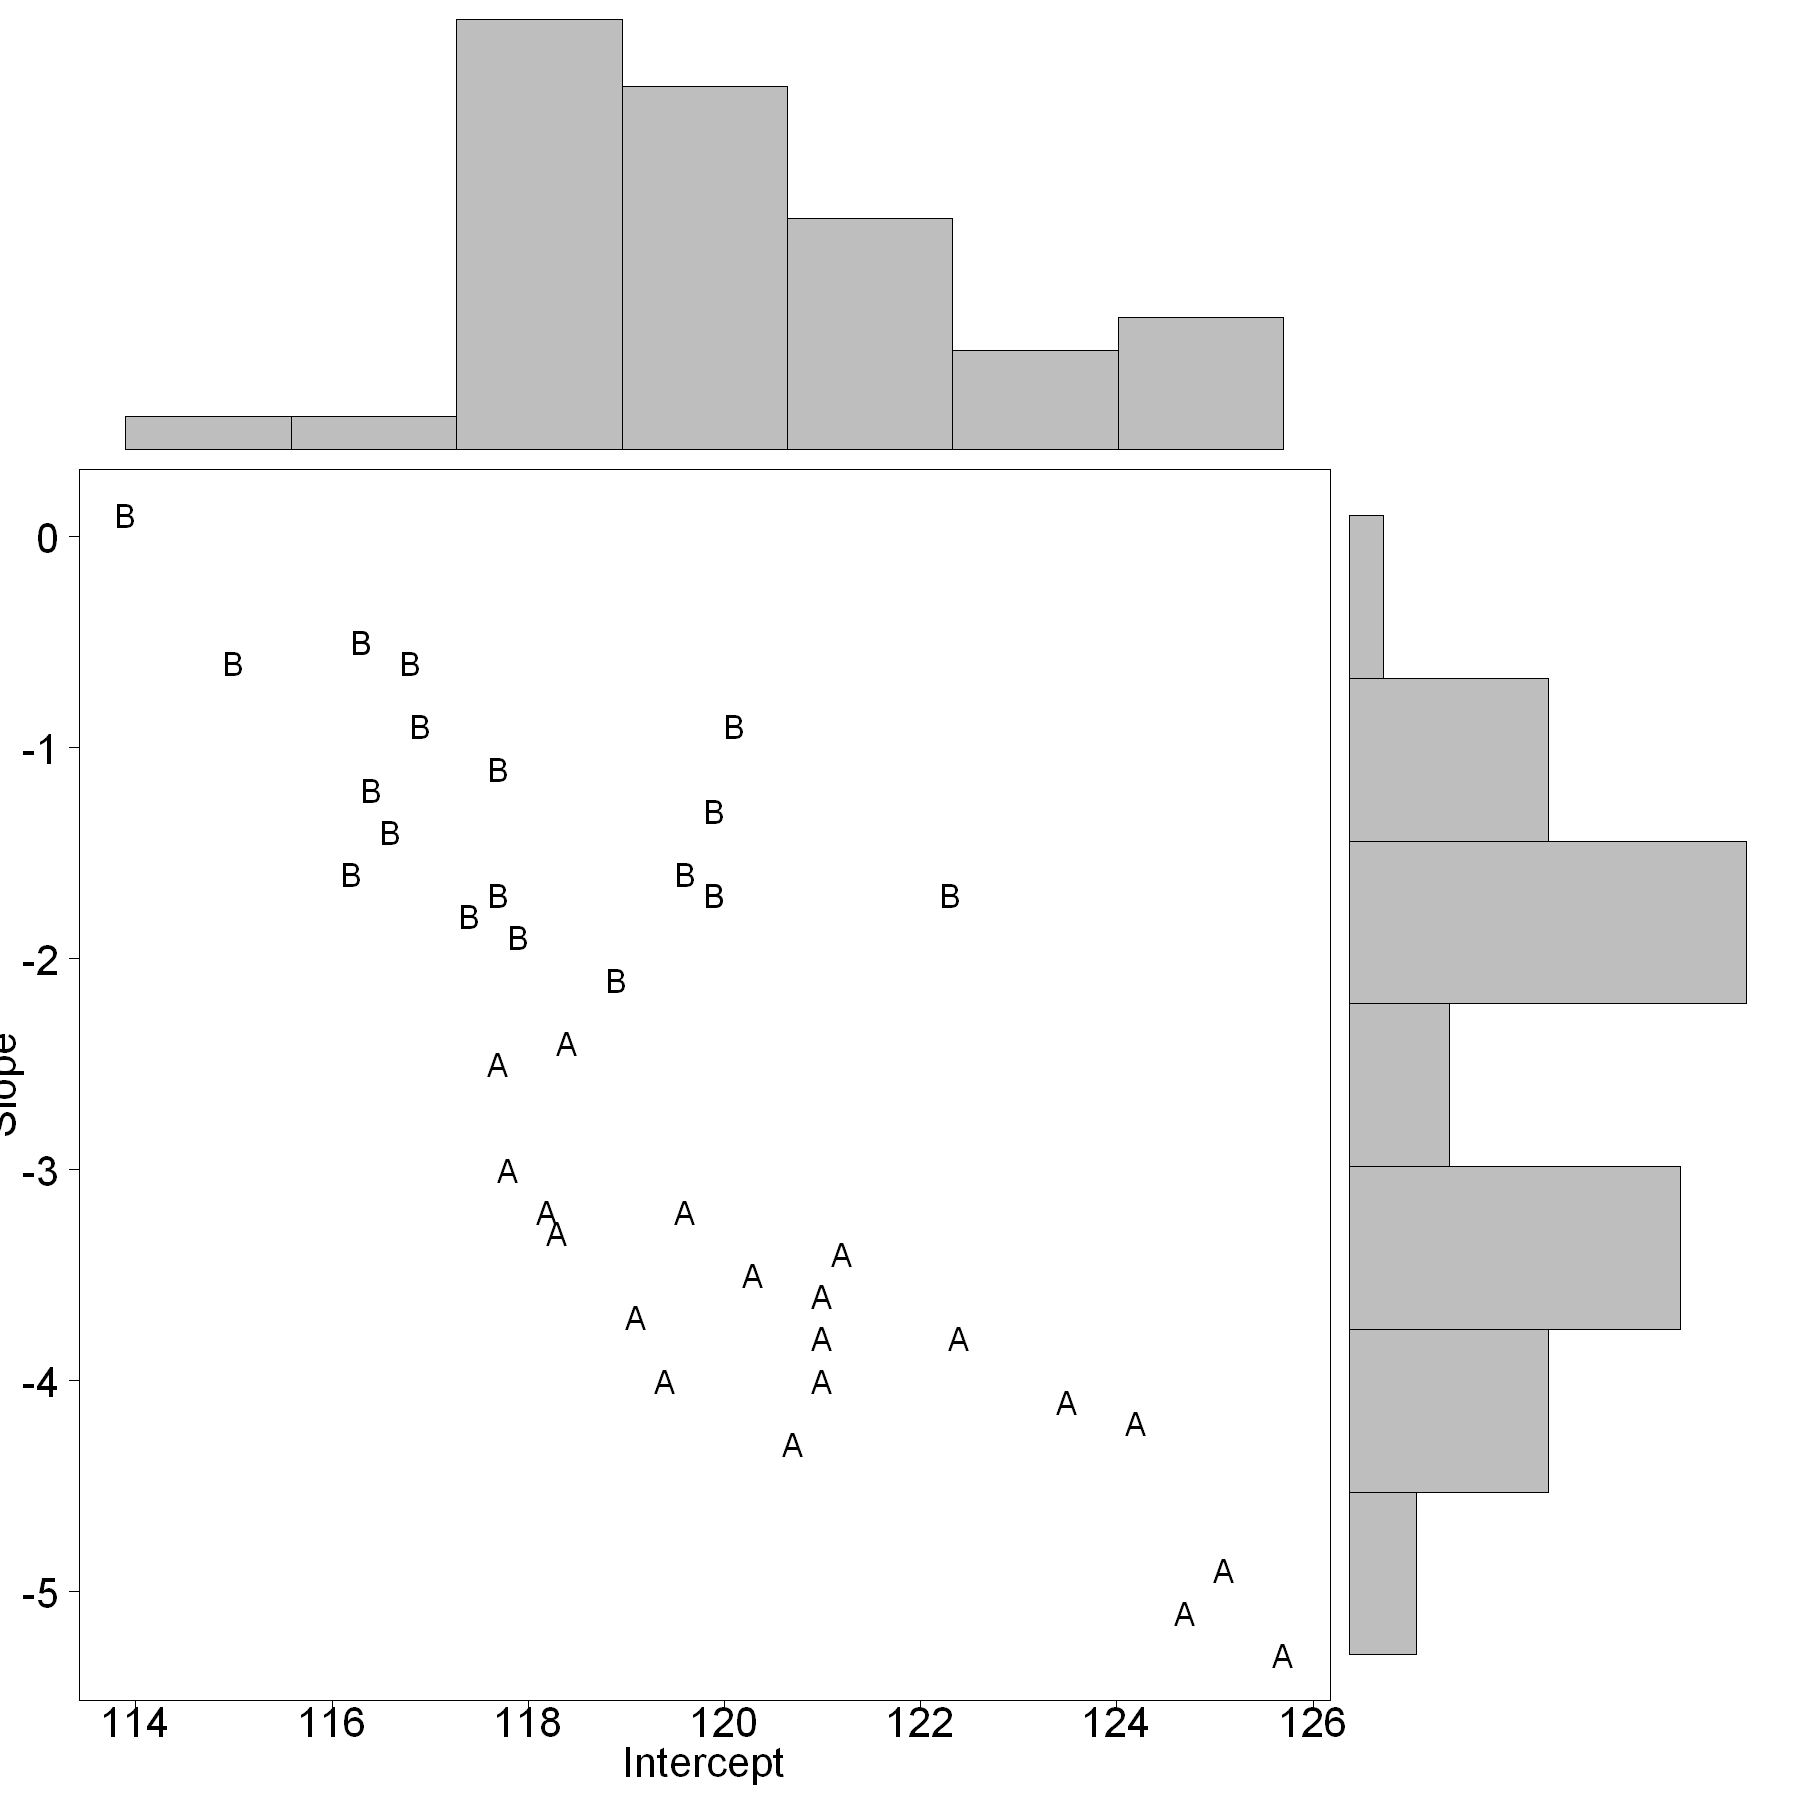

In [147]:
options(repr.plot.width=15,repr.plot.height=15)

# Make histogram for both intercept and slope
int.hist = hist(intercept,plot=F)
slope.hist = hist(slope,plot=F)

# make layout for plotting
top=max(c(int.hist$counts, slope.hist$counts))
nf =layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1),c(1,3),T)
par(mar=c(5,4,1,1))

# plot the intercept and slope
plot(Slope~Intercept,las=1, data=dat.coef,xlab="Intercept",
ylab="Slope",pch=as.character(TRT), cex=2, lwd=2, cex.axis = 2.5, cex.lab = 2.5)

par(mar=c(0,4,1,1))
# add the intercept and slope histograms
barplot(int.hist$counts, axes=FALSE,ylim=c(0,top),space=0)
par(mar=c(5,0,1,1))
barplot(slope.hist$counts,axes=FALSE,xlim=c(0,top),
space=0,horiz=TRUE)


We see that the slope of A declines faster than the slope of B. The variations embedded in the intercept and slope illustrate the modeling of random-effects for both intercept and slope.

We now model the slope and intercept relationshps by a linear regression. 

#### Fit model1 with interaction term 

In [148]:
mod1.coef = lm(Slope~Intercept*TRT, dat.coef)
summary(mod1.coef)


Call:
lm(formula = Slope ~ Intercept * TRT, data = dat.coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66359 -0.29475 -0.03143  0.34701  0.75317 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28.33737    4.68741   6.045 6.04e-07 ***
Intercept      -0.26539    0.03874  -6.850 5.17e-08 ***
TRTB           -8.29639    7.37956  -1.124    0.268    
Intercept:TRTB  0.08475    0.06198   1.367    0.180    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4293 on 36 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.9122 
F-statistic: 136.1 on 3 and 36 DF,  p-value: < 2.2e-16


The interaction term Intercept:TRTB is not significantly significant (p-value is 0.268 > $\alpha$=0.05)

#### Fit model 2 without interaction term

In [149]:
mod2.coef = lm(Slope~Intercept+TRT, dat.coef)
summary(mod2.coef)


Call:
lm(formula = Slope ~ Intercept + TRT, data = dat.coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73316 -0.38494  0.02806  0.33483  0.87272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.33216    3.70220   6.572 1.06e-07 ***
Intercept   -0.23228    0.03059  -7.592 4.68e-09 ***
TRTB         1.79136    0.16831  10.643 8.16e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4343 on 37 degrees of freedom
Multiple R-squared:  0.9147,	Adjusted R-squared:  0.9101 
F-statistic: 198.5 on 2 and 37 DF,  p-value: < 2.2e-16


From model2, two tretments are significantly different (TRT B). Further analysis of the difference between treatments are performed using the t-test.

In [150]:
#test slope difference
t.test(Slope ~ TRT, dat.coef)


	Welch Two Sample t-test

data:  Slope by TRT
t = -11.673, df = 35.556, p-value = 1.019e-13
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -2.96976 -2.09024
sample estimates:
mean in group A mean in group B 
         -3.765          -1.235 


In [151]:
#test Intercept difference
t.test(Intercept ~ TRT, dat.coef)


	Welch Two Sample t-test

data:  Intercept by TRT
t = 4.3669, df = 36.266, p-value = 0.0001008
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 1.703495 4.656505
sample estimates:
mean in group A mean in group B 
        120.965         117.785 


We see that the slope and intercent between group A and group B are significantly different. 

In the analysis of data from longitudinal clinical trials, we called the preliminary data analysis "reponse feature" analysis. We gan get basic summay information through this analysis, but more efficient analysis is necessay including all information from the data in a comprehensive manner. 

#### 6.3.1.2  Longitudinal Modeling

In [152]:
# install.packages('lme4')
# install.packages('lmerTest')

We fit 
* 'Model 1' with TRT-by-Time interaction as random-effcts on the intercept and slope on Time and
* Compare it to the 'Model2' with random intercept only

In [153]:
library(lmerTest)

#### Fit Model1

* DBP : the reponse variable
* TRT*Time : Interaction effect
* (Time|Subject):  random-effcts on the intercept and slope on Time

In [154]:
mod1DBP = lmer(DBP ~ TRT*Time + (Time|Subject), data=Dat)
summary(mod1DBP)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DBP ~ TRT * Time + (Time | Subject)
   Data: Dat

REML criterion at convergence: 875.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3315 -0.5802 -0.0566  0.5172  2.5636 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Subject  (Intercept) 1.4145   1.189         
          Time        0.1163   0.341    -0.42
 Residual             3.5349   1.880         
Number of obs: 200, groups:  Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 120.9650     0.5149  38.0077 234.917  < 2e-16 ***
TRTB         -3.1800     0.7282  38.0077  -4.367 9.37e-05 ***
Time         -3.7650     0.1533  38.0084 -24.565  < 2e-16 ***
TRTB:Time     2.5300     0.2168  38.0084  11.672 3.91e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
          (Intr) TRTB   Time  
TRTB      -0.707   

Model1 includes an interaction effect between "TRT" and "Time" with both intercept and slope as random-effect

#### Fit Model2

* DBP : the reponse variable
* TRT*Time : Interaction effect
* (1|Subject): Random effect (Intercept)

In [155]:
# Fit Model2
# (1|Subject): random intercept since we guess DBP is effected by subjects.
mod2DBP = lmer(DBP ~ TRT*Time + (1|Subject), data=Dat)
summary(mod2DBP)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DBP ~ TRT * Time + (1 | Subject)
   Data: Dat

REML criterion at convergence: 877.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2031 -0.5418 -0.0512  0.5541  2.3326 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 1.377    1.174   
 Residual             3.815    1.953   
Number of obs: 200, groups:  Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 120.9650     0.5279 159.1764  229.15  < 2e-16 ***
TRTB         -3.1800     0.7466 159.1764   -4.26 3.49e-05 ***
Time         -3.7650     0.1381 158.0000  -27.26  < 2e-16 ***
TRTB:Time     2.5300     0.1953 158.0000   12.95  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
          (Intr) TRTB   Time  
TRTB      -0.707              
Time      -0.785  0.555       
TRTB:Time  0.555 -0.785 

Model2 includes an interaction effect between "TRT" and "Time" with both intercept as random-effect. 

#### Model Comparison

In [156]:
anova(mod1DBP, mod2DBP)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod2DBP,6,884.5423,904.3322,-436.2711,872.5423,NA,NA,NA
mod1DBP,8,886.4223,912.8088,-435.2111,870.4223,2.119995,2,0.3464567


We note that the p-value is 0.35, which means that these two models are not statiscally significantly different. The simpler "Model2" is thus recommended.

#### Further investigate - Model3

* DBP : the reponse variable
* TRT, Time : explanatory variables
* (Time|Subject): random-effcts on the intercept and slope on Time

In [157]:
mod3DBP = lmer(DBP ~ TRT + Time + (Time|Subject), data=Dat)
summary(mod3DBP)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.00421966 (tol = 0.002, component 1)"


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DBP ~ TRT + Time + (Time | Subject)
   Data: Dat

REML criterion at convergence: 933.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3319 -0.5517 -0.0048  0.5203  2.5241 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Subject  (Intercept) 12.629   3.554         
          Time         1.747   1.322    -0.95
 Residual              3.534   1.880         
Number of obs: 200, groups:  Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 117.6478     0.6817  26.8837 172.572  < 2e-16 ***
TRTB          3.4543     0.4555  37.9782   7.584 4.05e-09 ***
Time         -2.5000     0.2291  38.9696 -10.910 2.07e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr) TRTB  
TRTB -0.334       
Time -0.881  0.000
optimizer (nloptwrap) convergence code: 0 (OK)
Model fa

#### Further investigate - Model4

* DBP : the reponse variable
* TRT, Time : explanatory variables
* (1|Subject): Random effect (Intercept)

In [158]:
mod4DBP = lmer(DBP ~ TRT + Time + (1|Subject), data=Dat)
summary(mod4DBP)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DBP ~ TRT + Time + (1 | Subject)
   Data: Dat

REML criterion at convergence: 991.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2399 -0.6380 -0.0322  0.7782  2.1059 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.5771   0.7597  
 Residual             7.8164   2.7958  
Number of obs: 200, groups:  Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 117.1700     0.5319 161.3666 220.298  < 2e-16 ***
TRTB          4.4100     0.4626  38.0000   9.532 1.27e-11 ***
Time         -2.5000     0.1398 159.0000 -17.884  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr) TRTB  
TRTB -0.435       
Time -0.788  0.000

#### Model Comparison

In [159]:
anova(mod3DBP, mod4DBP)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod4DBP,5,998.3321,1014.8236,-494.1660,988.3321,NA,NA,NA
mod3DBP,7,945.3403,968.4286,-465.6702,931.3403,56.99172,2,4.211191e-13


Model3 is statiscally significantly different from Model4 as indicated by the small p-value(<0.0001). <br>
We further investigate the effects from the covariate (explanatory variaables)

#### Model3 model

The final Model3 corresponds to
$$DBP_{i,j,k}=(\beta_0+\gamma_{01})+(\beta_1+\gamma_{1k})\times Time_j+TRT_i+\epsilon_{i,j,k}$$

Where
* i: treatment A or B
* j: times from 1 to 5
* k: patients from 1 to 40

We recall the model3 output again. 

In [202]:
# round(summary(mod3DBP)$coefficients[,1][],3)

In [203]:
fixEffect<-fixef(mod3DBP)
randEffect<-as.data.frame(ranef(mod3DBP))

In [204]:
fixEffect

(Intercept)        TRTB        Time 
 117.647842    3.454315   -2.500000

The fixed-effects are estimated as 
* $\hat{\beta_0}$ = 117.648 and 
* $\hat{\beta}_{time}$ = -2.5 which indicates that DBP declines at a rate of 2.5 mmHg per month.
* $\hat{\beta}_{TRT_B}$ = 3.5 is the estimated difference between the rates of declines of treatments B and A is 3.45 mmHg/month. 

And all parameters are statistically significant. 

For random-effect, the estimated $\hat{\sigma}=3.54$ 
and
$\hat{D}= 
\begin{pmatrix}
        12.62 &  -4.44 \\
        -4.44 &  1.75
\end{pmatrix}
$

$covariance = -0.95\times 3.554 \times 1.322$

#### Check the normal assumption for the random-effect

We can use the QQ-plot to graph the quantile from the residuals and the theoretical normal

#### FIGURE 6.5: QQ-Plot for Model3

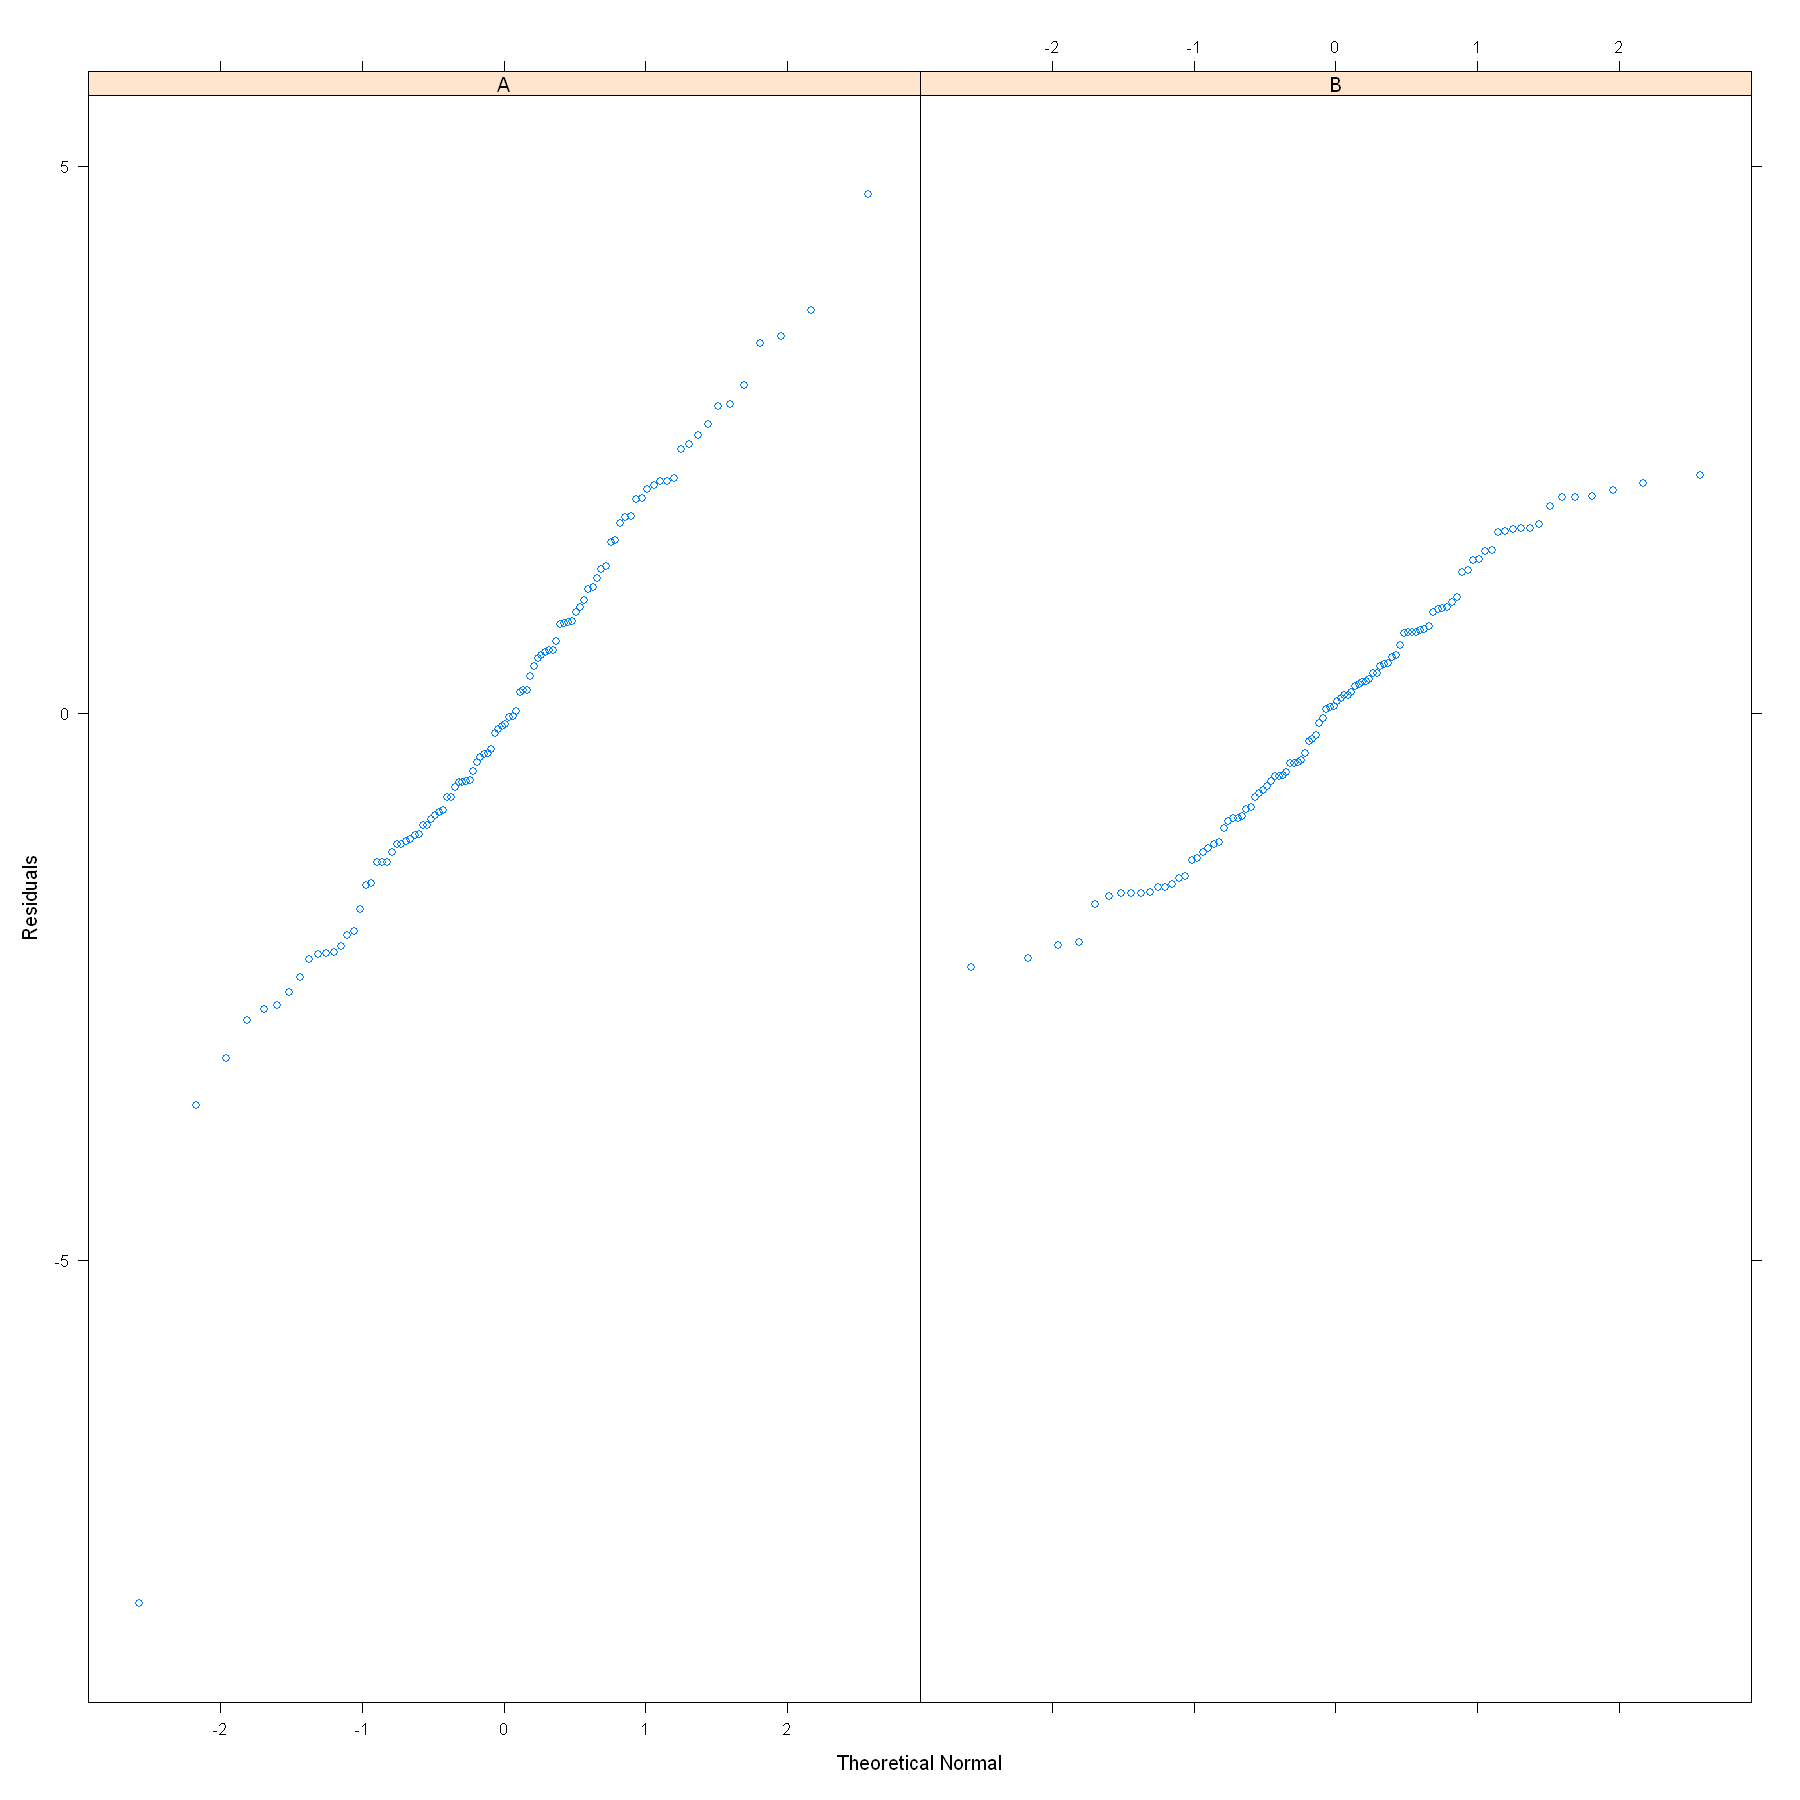

In [206]:
print(qqmath(~resid(mod3DBP)|TRT, Dat, xlab="Theoretical Normal", ylab="Residuals"))

The QQ-plot exhibits a straight line for each treatment indicating no violation of the normality assumption.

In [208]:
# Add shapiro wilk test
shapiro.test()

ERROR: Error in shapiro.test(~resid(mod3DBP) | TRT): is.numeric(x) is not TRUE


#### FIGURE 6.6: Boxplot for Residuals for all Subjects by Treatment

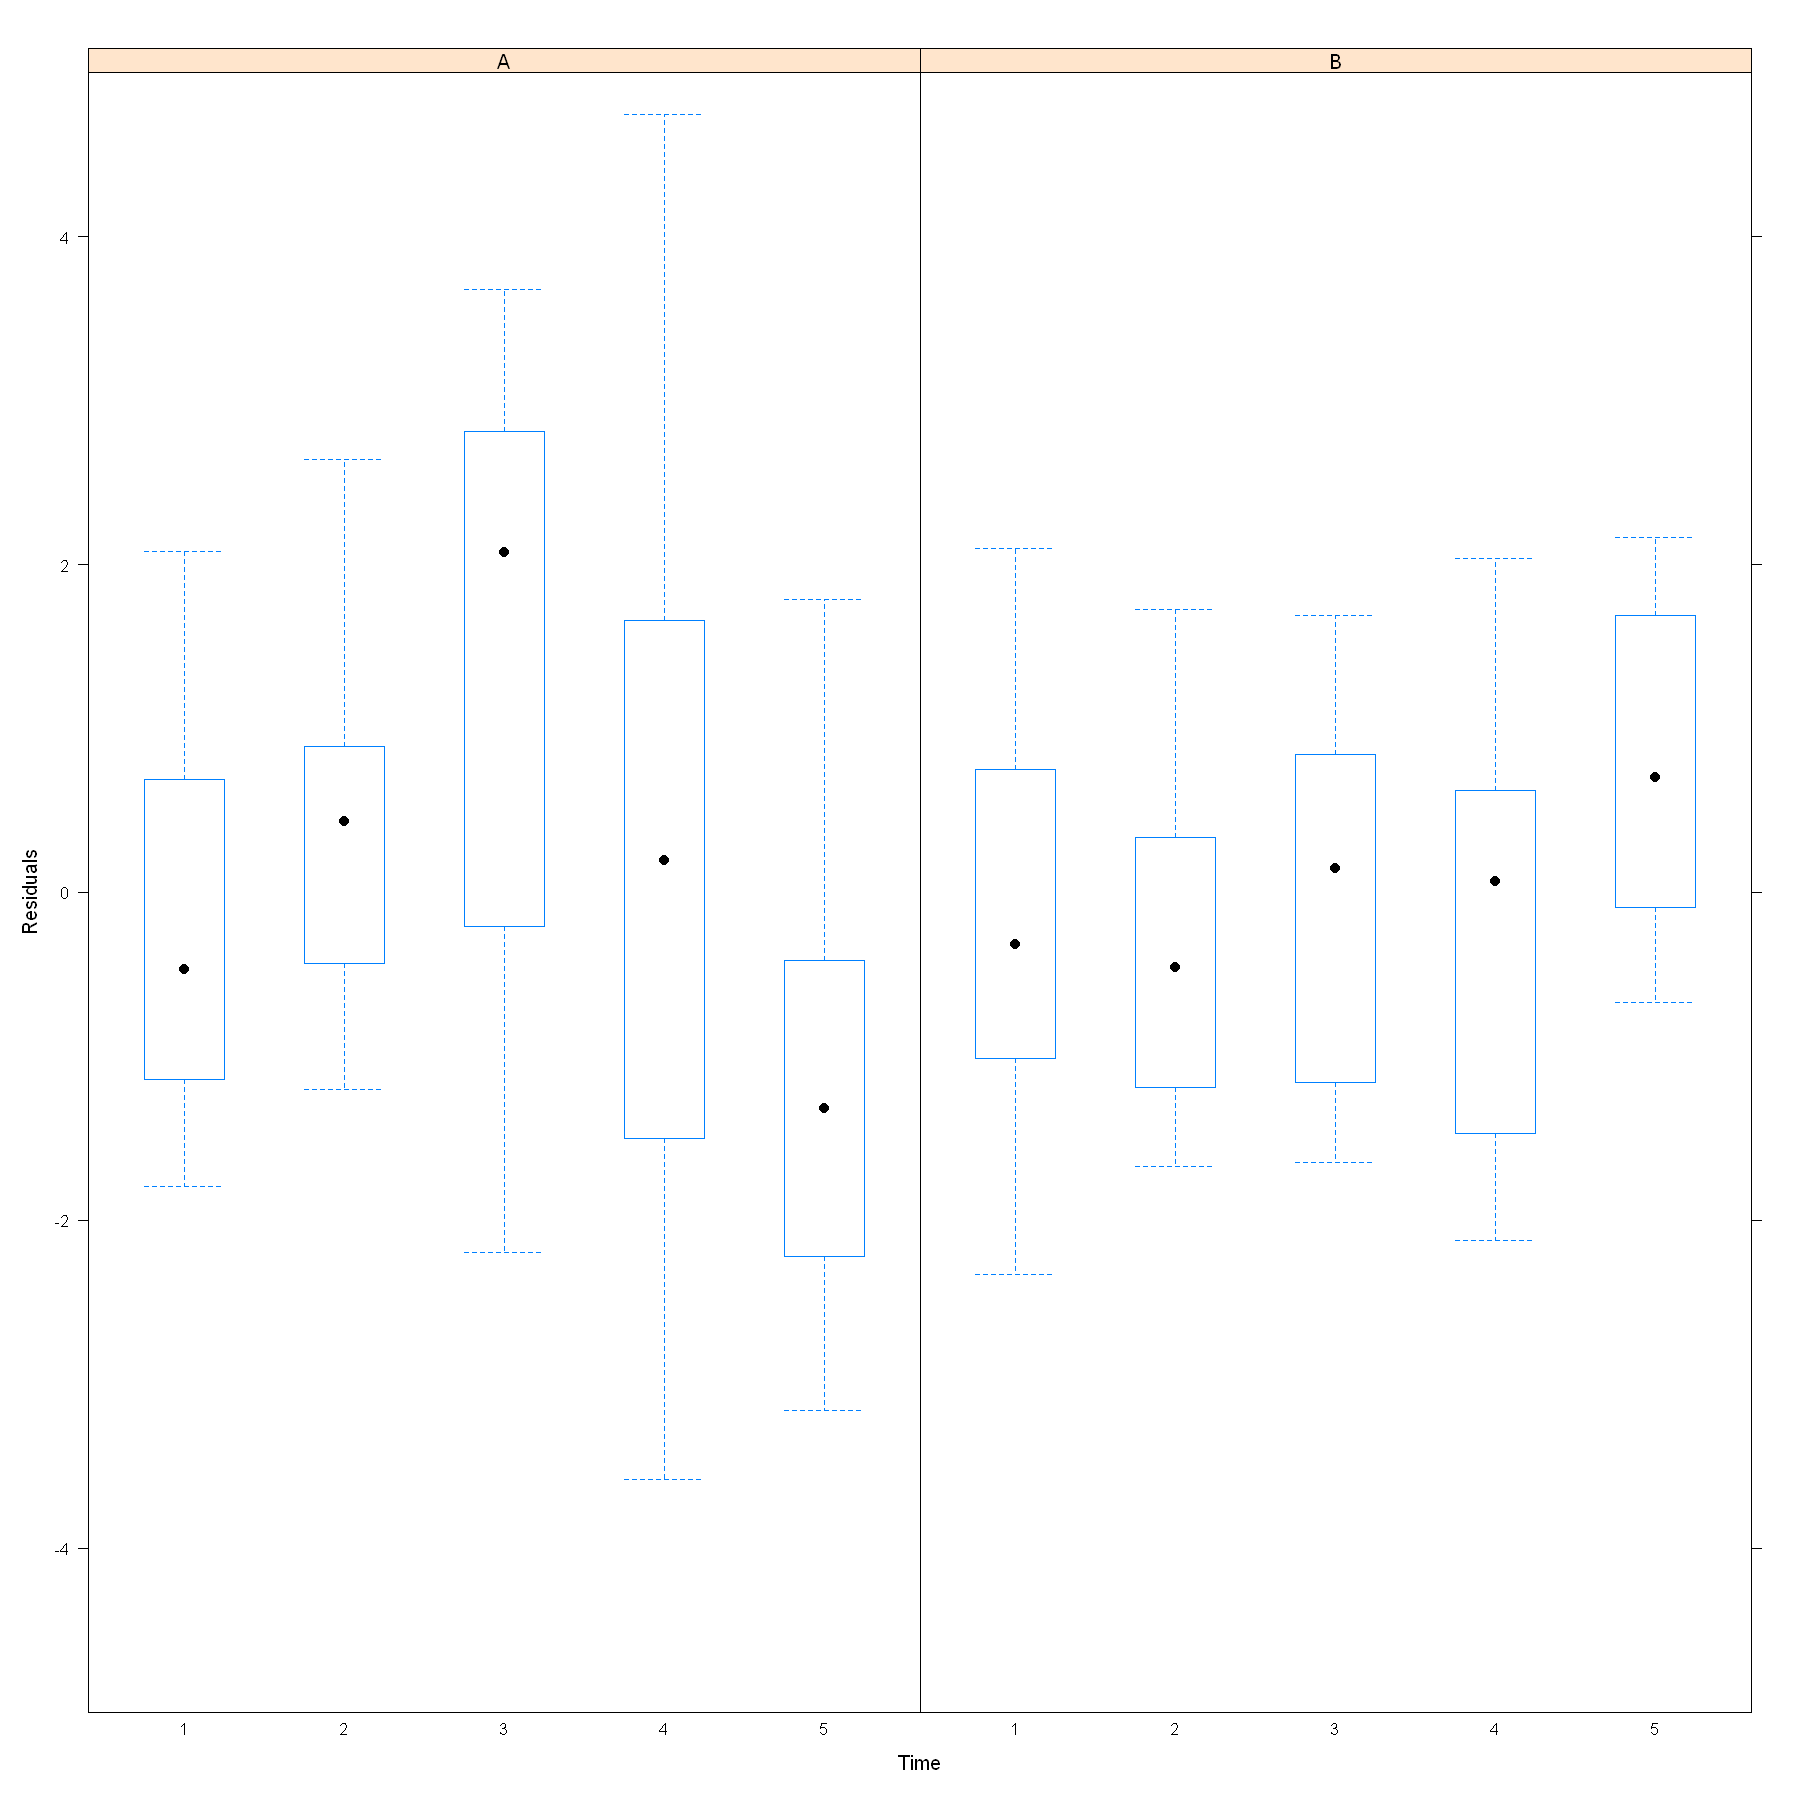

In [213]:
print(bwplot(resid(mod3DBP)~as.factor(Time)|TRT,Dat,
xlab="Time",ylim=c(-5,5), ylab="Residuals"))

Figure 6.6 indicates that Model3 is reasonable.

#### We now investigate the effects of the covariates of "Age" and "Sex" (Model5 and Model6) from the Model3

#### Model5 - "Age" effect

In [215]:
mod5DBP = lmer(DBP ~ TRT + Time + Age + (Time|Subject), data=Dat)

boundary (singular) fit: see help('isSingular')

Warning message:
"Model failed to converge with 1 negative eigenvalue: -3.5e+01"


#### Compare Model3 and Model5

In [217]:
anova(mod3DBP, mod5DBP)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod3DBP,7,945.3403,968.4286,-465.6702,931.3403,NA,NA,NA
mod5DBP,8,943.9820,970.3686,-463.9910,927.9820,3.358303,1,0.06686695


We can wee from the "anova" that the p-value associated with this test on "Age" effect is 0.067 which is not statistically significant.
* __However, the Model 5 is significant. I used same code but the result is different.__

Anyway, we further test "Sex" using Model6.

#### Model 6

In [218]:
mod6DBP = lmer(DBP ~ TRT + Time + Age + Sex + (Time|Subject), data=Dat)

boundary (singular) fit: see help('isSingular')



In [219]:
anova(mod5DBP, mod6DBP)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod5DBP,8,943.982,970.3686,-463.991,927.982,NA,NA,NA
mod6DBP,10,914.232,947.2152,-447.116,894.232,33.75004,2,4.691081e-08


This gives p-value of very small (<0.001) indicating that "Sex" is statistically significant effect. Note that again, my result and text book are different. Then now I try model7 (Sex effect) comparing model3

In [220]:
mod7DBP = lmer(DBP ~ TRT + Time + Sex + (Time|Subject), data=Dat)

In [221]:
anova(mod3DBP, mod7DBP)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod3DBP,7,945.3403,968.4286,-465.6702,931.3403,NA,NA,NA
mod7DBP,9,948.0729,977.7577,-465.0364,930.0729,1.267442,2,0.5306138


This gives a p-value of 0.53 indicating that "Sex" is not a statistically significant effect. In my conclusion, the simpler model3 is recommended.